In [56]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows=999

df= pd.read_csv('ventas_tienda.csv')

print(df)

          Fecha   Producto  Cantidad  Precio Cliente           Pago
0    2024-05-08    Manzana         2    1500  Daniel  Transferencia
1    2024-06-24       Piña         4    1200    Juan  Transferencia
2    2024-01-26    Manzana         3    1500    Luis  Transferencia
3    2024-05-15  Mandarina         1     900   Juana        Tarjeta
4    2024-05-19      Melón         3    1000   Juana        Tarjeta
5    2024-08-28      Mango         1    1300    Juan        Tarjeta
6    2024-05-21      Fresa         4    1600   Sofía        Tarjeta
7    2024-07-18    Manzana         4    1500  Andrés        Tarjeta
8    2024-03-17    Manzana         5    1500    Luis  Transferencia
9    2024-07-29       Piña         1    1200  Daniel       Efectivo
10   2024-07-03    Manzana         4    1500   Maria  Transferencia
11   2024-01-27      Mango         5    1300   Juana       Efectivo
12   2024-05-12      Fresa         2    1600  Carlos       Efectivo
13   2024-03-05     Banano         4     800  Ca

In [57]:
new_df=df.dropna()
new_df["Fecha"] = pd.to_datetime(new_df["Fecha"], errors="coerce")
new_df["Fecha"] = new_df["Fecha"].dt.strftime("%m-%d-%Y")
new_df= new_df.sort_values(by='Fecha', ascending= False)

print(new_df)

          Fecha   Producto  Cantidad  Precio Cliente           Pago
70   09-06-2024       Piña         2    1200  Daniel       Efectivo
113  09-05-2024      Melón         4    1000   Juana  Transferencia
234  09-01-2024     Banano         5     800  Andrés       Efectivo
253  09-01-2024     Papaya         1    1100   Maria       Efectivo
181  08-31-2024       Piña         3    1200  Daniel  Transferencia
276  08-30-2024      Mango         1    1300  Carlos  Transferencia
86   08-30-2024    Manzana         4    1500  Andrés        Tarjeta
277  08-29-2024     Banano         1     800  Andrés        Tarjeta
237  08-28-2024     Banano         4     800   Maria  Transferencia
220  08-28-2024      Mango         5    1300  Andrés        Tarjeta
5    08-28-2024      Mango         1    1300    Juan        Tarjeta
110  08-27-2024      Mango         1    1300   Sofía       Efectivo
119  08-26-2024     Banano         3     800    Luis        Tarjeta
147  08-26-2024      Melón         3    1000    

In [58]:
producto_mas_vendido= new_df.groupby('Producto')['Cantidad'].sum().sort_values(ascending=False)
print(producto_mas_vendido)
print(f'El producto mas vendido fue {producto_mas_vendido.index[0]} con estas ventas: {producto_mas_vendido.iloc[0]}')

Producto
Banano       130
Piña         110
Manzana       98
Fresa         89
Mango         84
Sandía        83
Melón         78
Mandarina     76
Uva           76
Papaya        49
Name: Cantidad, dtype: int64
El producto mas vendido fue Banano con estas ventas: 130


In [59]:
ventas_por_metodo_de_pago= new_df.groupby('Pago')['Precio'].sum().sort_values(ascending=False)
print(ventas_por_metodo_de_pago)
print(f'Se vendio mas en este metodo de pago: {ventas_por_metodo_de_pago.index[0]}')

Pago
Tarjeta          143000
Efectivo         126000
Transferencia    122200
Name: Precio, dtype: int64
Se vendio mas en este metodo de pago: Tarjeta


In [60]:
ventas_por_comprador=new_df.groupby('Cliente')['Precio'].sum().sort_values(ascending= False)
print(ventas_por_comprador)

Cliente
Juana     58800
Carlos    46900
Maria     44100
Daniel    43700
Sofía     38700
Luis      36300
Juan      35200
Andrés    32000
Ana       28700
Pedro     26800
Name: Precio, dtype: int64


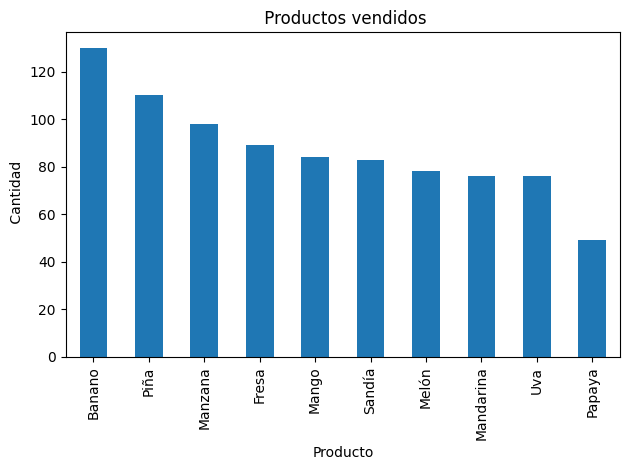

In [61]:
producto_mas_vendido.plot(kind= 'bar' , title= " Productos vendidos" , ylabel=' Cantidad')
plt.tight_layout()
plt.show()

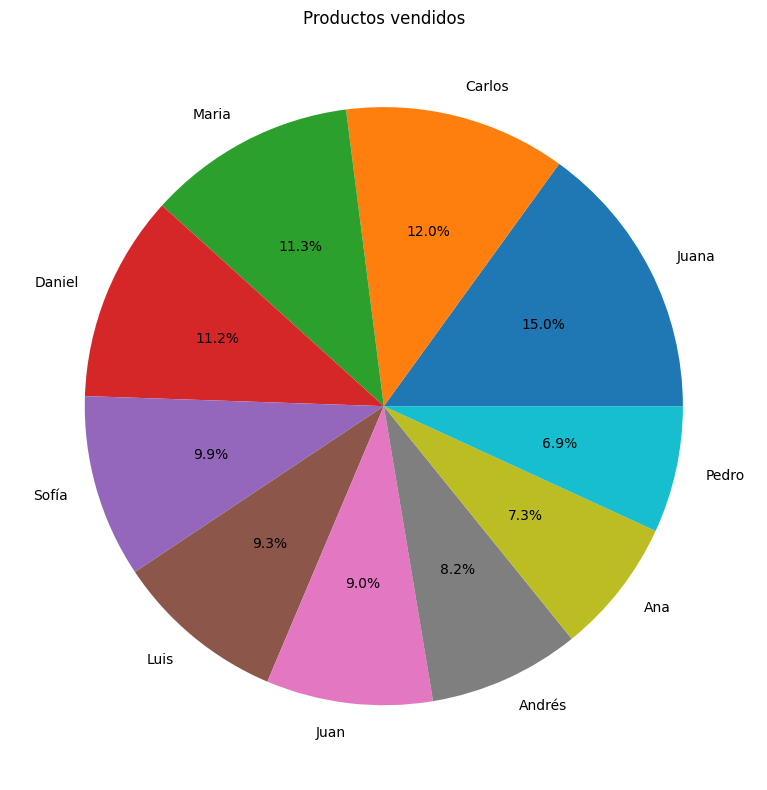

In [62]:
# Gráfico de pastel
ventas_por_comprador.plot(
    kind='pie',
    title="Productos vendidos",
    autopct='%1.1f%%',
    ylabel='',
    figsize=(8, 8)
)

plt.tight_layout()
plt.show()

In [63]:
new_df["Total a Pagar"]= new_df['Cantidad']* new_df['Precio']
print(new_df)



          Fecha   Producto  Cantidad  Precio Cliente           Pago  \
70   09-06-2024       Piña         2    1200  Daniel       Efectivo   
113  09-05-2024      Melón         4    1000   Juana  Transferencia   
234  09-01-2024     Banano         5     800  Andrés       Efectivo   
253  09-01-2024     Papaya         1    1100   Maria       Efectivo   
181  08-31-2024       Piña         3    1200  Daniel  Transferencia   
276  08-30-2024      Mango         1    1300  Carlos  Transferencia   
86   08-30-2024    Manzana         4    1500  Andrés        Tarjeta   
277  08-29-2024     Banano         1     800  Andrés        Tarjeta   
237  08-28-2024     Banano         4     800   Maria  Transferencia   
220  08-28-2024      Mango         5    1300  Andrés        Tarjeta   
5    08-28-2024      Mango         1    1300    Juan        Tarjeta   
110  08-27-2024      Mango         1    1300   Sofía       Efectivo   
119  08-26-2024     Banano         3     800    Luis        Tarjeta   
147  0

In [64]:
pago_mas_alto= new_df.groupby('Cliente')['Total a Pagar'].sum().sort_values(ascending=False)
print('El pago mas alto es:')
print(pago_mas_alto)

El pago mas alto es:
Cliente
Juana     172200
Maria     130600
Carlos    129100
Daniel    124200
Luis      109300
Juan      108500
Sofía     106500
Andrés     98000
Ana        80300
Pedro      79000
Name: Total a Pagar, dtype: int64
